# TFM JULIAN MARCOS VÁZQUEZ

# ANÁLISIS CARACTERÍSTICAS DE LOS JUGADORES DEL FIFA 2019

# APRENDIZAJE SUPERVISADO - REGRESIÓN.

# Predicción de la puntuación total a partir de las características del jugador¶



In [70]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [71]:
# Lectura del dataset
df = pd.read_csv("Jugadores_Fifa2019_limpio.csv")
df

,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Weight_Kg,Height_cms
0,0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,...,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,72.3,170
1,1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,...,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,83.2,188
2,2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,...,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,68.2,175
3,3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,...,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,76.4,193
4,4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,...,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,70.0,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16638,18202,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,€1K,1307,...,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K,60.9,175
16639,18203,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€60K,€1K,1098,...,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K,77.3,190
16640,18204,B. Worman,16,England,47,67,Cambridge United,€60K,€1K,1189,...,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K,67.3,173
16641,18205,D. Walker-Rice,17,England,47,66,Tranmere Rovers,€60K,€1K,1228,...,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K,70.0,178


In [72]:
# Elimino a los porteros del dataset
df_jugadores = df[df.Position != 'GK']
df_jugadores


,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Weight_Kg,Height_cms
0,0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,...,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,72.3,170
1,1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,...,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,83.2,188
2,2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,...,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,68.2,175
4,4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,...,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,70.0,180
5,5,E. Hazard,27,Belgium,91,91,Chelsea,€93M,€340K,2142,...,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M,74.1,173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16638,18202,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,€1K,1307,...,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K,60.9,175
16639,18203,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€60K,€1K,1098,...,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K,77.3,190
16640,18204,B. Worman,16,England,47,67,Cambridge United,€60K,€1K,1189,...,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K,67.3,173
16641,18205,D. Walker-Rice,17,England,47,66,Tranmere Rovers,€60K,€1K,1228,...,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K,70.0,178


In [73]:
#Mostrar columnas
df.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Nationality', 'Overall', 'Potential',
       'Club', 'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Position',
       'Jersey Number', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause', 'Weight_Kg', 'Height_cms'],
      dtype='object')

In [74]:
# Cojo la variable y (PUntuación media del jugador)--> (Serie de pandas) como la variable a predecir, 
# y las características del jugador con mayor coeficiente (calculado en "ML_Regresion_Multiple.ipynb") en la 
# variable X excluyendo las que corresponden a los porteros --> Dataframe de Pandas)

# Crossing 	0.029332
# Finishing 	0.010408
# HeadingAccuracy 	-0.024602
# ShortPassing 	0.043695
# Volleys 	-0.008355
# Dribbling 	-0.023605
# Curve 	0.011685
# FKAccuracy 	-0.006033
# LongPassing 	0.006425
# BallControl 	0.060571
# Acceleration 	0.020313
# SprintSpeed 	0.021866
# Agility 	0.002643
# Reactions 	0.480393
# Balance 	-0.053477
# ShotPower 	0.019524
# Jumping 	0.031229
# Stamina 	-0.010526
# Strength 	0.059977
# LongShots 	-0.006791
# Aggression 	-0.014529
# Interceptions 	-0.007972
# Positioning 	-0.082645
# Vision 	0.026535
# Penalties 	-0.017206
# Composure 	0.157253
# Marking 	0.006023
# StandingTackle 	-0.000769
# SlidingTackle 	-0.024206

df['Media']=(df['Reactions']+df['Composure']+df['BallControl'])/3
df['Media']

0        95.666667
1        95.000000
2        94.333333
3        66.666667
4        90.000000
           ...    
16638    45.666667
16639    40.666667
16640    44.000000
16641    39.666667
16642    48.333333
Name: Media, Length: 16643, dtype: float64

In [75]:
# Cogemos la variable y (Serie de pandas) como la variable a predecir, y el resto de variables excluyendo las que 
# corresponden a los porteros (Dataframe de Pandas)

y = df["Overall"]
X = df[['Media']]

# 1. REGRESIÓN LINEAL

In [76]:
# Cargo la librería para utilizar regresión lineal 
from sklearn.linear_model import LinearRegression

In [77]:
#Creo una instancia del modelo
reg = LinearRegression()

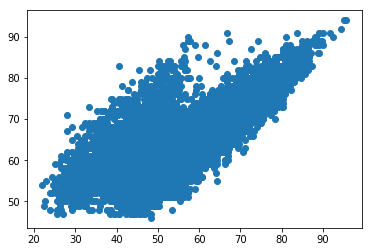

In [78]:
# Veo la distribución de los datos
plt.scatter(X,y)

In [79]:
#Entrego el regresor. Ajustamos en python
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [80]:
reg.coef_

array([0.48370502])

In [81]:
# De la ecuación de la recta y = mX + b nuestra pendiente «m» de nuestra recta de regresión es el coeficiente 0,4837

In [82]:
# Para ver si predice correctamente, predigo 3 valores al azar
reg.predict([[39],[60],[85]])

array([56.25068861, 66.40849394, 78.50111934])

In [83]:
#Cargo la librería para hacer la separación entre los datos de test y de entrenamiento
from sklearn.model_selection import train_test_split

In [84]:
# Defino los datos de entrada y salida para test y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.10, random_state = 42)

In [85]:
# Ajuste de los datos de entrenamiento
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [86]:
# Predecimos los datos
pred = reg.predict(X_test)

# CÁLCULO DE MÉTRICAS

In [87]:
# Vamos a evaluar los datos y parece que los datos son buenos
from sklearn import metrics

In [88]:
# MAE: Error absoluto medio: es la suma de los valores absolutos del error
print("MAE", metrics.mean_absolute_error(y_test, pred))

MAE 3.4833275430052706


In [89]:
# MAPE: Es casi lo mismo que MAE pero con el valor en %. NO está en Sklearn
np.mean(np.abs((y_test-pred)/y_test))

0.05383396779797511

In [90]:
# MSE: Error cuadrático medio, es la media de la diferencia entre los puntos reales de datos y la salida predicha, al cuadrado
print("MSE", metrics.mean_squared_error(y_test, pred))

MSE 21.55151804577716


In [91]:
# RMSE: Error cuadrático medio,es la raíz de la media de los errores elevados al cuadrado.
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, pred)))


RMSE 4.6423612575689495


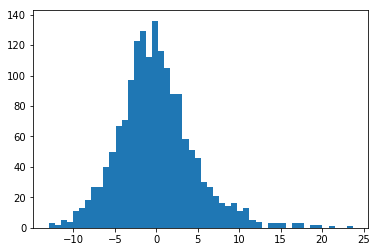

In [92]:
# Dibujo un histograma con el MAE
plt.hist(y_test-pred,bins=50);

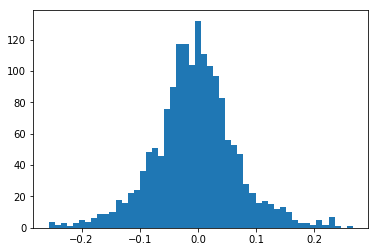

In [93]:
# Dibujo un histograma con el MAPE
plt.hist((y_test-pred)/y_test,bins=50);

In [94]:
xgrid = [[i] for i in np.linspace(10,100, 10)]

Text(0, 0.5, 'Puntuación media')

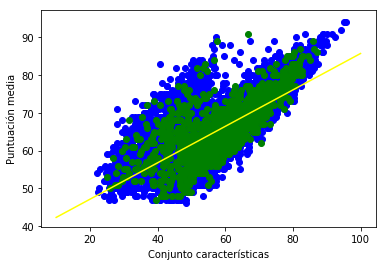

In [95]:
# Dibujo la distribución de los datos y la recta de regresión
plt.plot(xgrid, reg.predict(xgrid),color='yellow')
plt.scatter(X_train, y_train, color='b') # Datos de entrenamiento en azul
plt.scatter(X_test, y_test, c='g') # Datos de test en verde
plt.xlabel('Conjunto características')
plt.ylabel('Puntuación media')

# 2. ALGORITMO K-Neighbors

In [96]:
# Cargo la librería para el cálculo por algoritmo de K-Vecinos
from sklearn.neighbors import KNeighborsRegressor
# Creo una instancia
regk = KNeighborsRegressor(n_neighbors=4)
# Entreno los datos
regk.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=4, p=2,
          weights='uniform')

# CÁLCULO DE MÉTRICAS PARA K-VECINOS

In [97]:
# MAE para 4 vecinos
from sklearn import metrics
print("MAE", metrics.mean_absolute_error(y_test, regk.predict(X_test)))

MAE 3.492942942942943


In [98]:
xt = np.linspace(0,10,100)
yt = np.sin(xt)

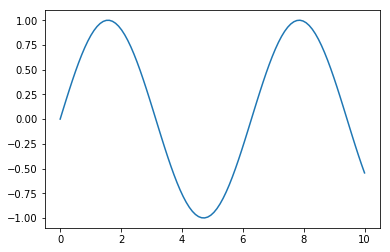

In [99]:
plt.plot(xt,yt)

In [100]:
np.corrcoef(xt,yt)[0][1]

-0.07589466694797188

In [101]:
# Vamos a hacer el cálculo con un bucle for para ver cuál es el número de vecinos óptimo para un menor MAES
maes = []
for i in range(4,100):
    regk = KNeighborsRegressor(n_neighbors=i)
    regk.fit(X_train,y_train)
    maes.append(metrics.mean_absolute_error(y_test,regk.predict(X_test)))
    

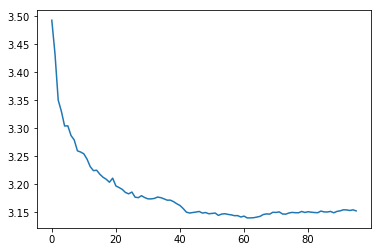

In [102]:
plt.plot(maes)

In [ ]:
# Parece que el valor óptimo estaría en torno a los 62 vecinos

In [103]:
from sklearn import metrics

In [104]:
print("MSE", metrics.mean_squared_error(y_test, regk.predict(X_test)))

MSE 19.05781937431769


In [105]:
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, regk.predict(X_test))))

RMSE 4.3655262425414065


Text(0, 0.5, 'Puntuación media')

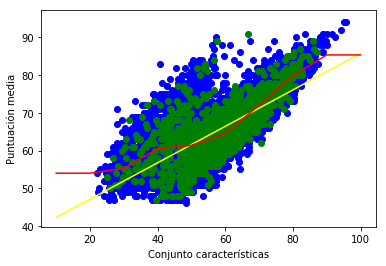

In [143]:
# Dibujo la distribución de los datos y la recta de regresión lineal y para k-vecinos
plt.plot(xgrid, reg.predict(xgrid),color='yellow') # Dibujamos la regresión lineal
plt.plot(xgrid, regk.predict(xgrid),color='red') # Dibujamos la recta de los k-vecinos
plt.scatter(X_train, y_train, color='b') # Datos de entrenamiento en azul
plt.scatter(X_test, y_test, c='g') # Datos de test en verde
plt.xlabel('Conjunto características')
plt.ylabel('Puntuación media')

# CROSS VALIDATION

La validación cruzada o cross-validation es una técnica utilizada para evaluar los resultados de un 
análisis estadístico y garantizar que son independientes de la partición entre datos de entrenamiento y prueba.
Consiste en repetir y calcular la media aritmética obtenida de las medidas de evaluación sobre diferentes particiones. 
Se utiliza en entornos donde el objetivo principal es la predicción y se quiere estimar la precisión de un modelo
que se llevará a cabo a la práctica.

In [108]:
# Cargo la librería
from sklearn.model_selection import cross_val_score
# Calculo la métrica para varios(5) subconjuntos, obteniendo 5 resultados para 5 training/tests
cross_val_score(reg,X,y,cv=5,scoring="neg_mean_squared_error")

array([-64.7715122 , -16.5630881 , -12.41777632, -15.97701831,
       -59.18317658])

In [109]:
# Calculo la media de los 5 valores del valor del MSE, en negativo
cross_val_score(reg,X,y,cv=5,scoring="neg_mean_squared_error").mean()

-33.782514301958045

In [110]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [111]:
# RMSE
np.sqrt(np.abs(cross_val_score(reg,X,y,cv=5,scoring="neg_mean_squared_error"))).mean()

5.466385108594521

In [112]:
# MAE
cross_val_score(reg,X,y,cv=5,scoring="neg_mean_absolute_error").mean()

-4.536854910895366

# GRID SEARCH

Permite evaluar y sellecionar de forma sistemática los mejores parámetros de un modelo. En este caso lo utilizaremos para hallar el valor óptimo de vecinos

In [113]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
reg_test = GridSearchCV(KNeighborsRegressor(),
                       param_grid={"n_neighbors":np.arange(3,50)})

In [114]:
#Cogemos toda la muestra, no el train, porque Grid Search incluye el X-VAlidation
reg_test.fit(X,y)

/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [115]:
 # Me dice cuál es el mejor número de vecinos, aunque en este caso parece que no coincide con el resultado anterior
reg_test.best_params_

{'n_neighbors': 25}

In [116]:
reg_test.best_score_

-4.831636775099819

In [117]:
# Buscamos el mejor modelo estimador para k-vecinos
reg_final = reg_test.best_estimator_

In [118]:
reg_final

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=25, p=2,
          weights='uniform')

In [119]:
# Vuelvo a hacer los cálculos para k=25

In [120]:
regk25 = KNeighborsRegressor(n_neighbors=25)
# Fit the data
regk25.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=25, p=2,
          weights='uniform')

In [123]:
print("MAE", metrics.mean_absolute_error(y_test, regk25.predict(X_test)))

MAE 3.193993993993994


In [124]:
print("MSE", metrics.mean_squared_error(y_test, regk25.predict(X_test)))

MSE 19.562637837837837


In [125]:
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, regk25.predict(X_test))))

RMSE 4.422967085321553


# 3. ALGORITMO DE ÁRBOLES DE DECISÍON O DECISSION TREE

In [126]:
# Cargo la librería para el algoritmo
from sklearn.tree import DecisionTreeRegressor
# Creo una instacia
regd = DecisionTreeRegressor(max_depth=3,min_samples_leaf=4)
# Entreno los datos
regd.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=4,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [127]:
# MAE
cross_val_score(regd,X,y,cv=5,scoring="neg_mean_absolute_error").mean()

-5.2578452839965015

In [130]:
# RMSE
np.sqrt(np.abs(cross_val_score(regd,X,y,cv=5,scoring="neg_mean_squared_error"))).mean()

5.977215591910809

In [131]:
# Calculo la media de los 5 valores del valor del MSE, en negativo
cross_val_score(regd,X,y,cv=5,scoring="neg_mean_squared_error").mean()

-42.59009758136968

# GRID SEARCH

In [132]:
regd_grid = GridSearchCV(DecisionTreeRegressor(),
                        param_grid = {"max_depth": np.arange(2,20),
                                      "min_samples_leaf": [10,20,30,40,50,60,70,80,90,100]
                        },cv = 5,
                        scoring = "neg_mean_absolute_error")

In [133]:
regd_grid.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]), 'min_samples_leaf': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [134]:
regd_grid.best_score_

-5.064056864524057

In [135]:
#Calculo los mejores parámetros para este algoritmo, saliendo que los mejores resultados son con profundidad 6
regd_grid.best_params_

{'max_depth': 6, 'min_samples_leaf': 100}

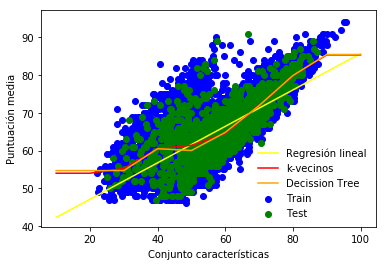

In [158]:
# Dibujo la recta de regresión comparándola con la de regresión lineal y k-vecinos
plt.plot(xgrid,reg.predict(xgrid),color='yellow', label= "Regresión lineal")
plt.plot(xgrid,regk.predict(xgrid),color='red',label= "k-vecinos")
plt.plot(xgrid,regd_grid.best_estimator_.predict(xgrid),color='orange', label= "Decission Tree")

plt.scatter(X_train,y_train,c='b',label ="Train")
plt.scatter(X_test,y_test,c='g', label="Test")
plt.xlabel('Conjunto características')
plt.ylabel('Puntuación media')
plt.legend(loc="best", frameon=False)

In [137]:
# Recalculo para los mejores parámetros obtenidos
regd6 = DecisionTreeRegressor(max_depth=6,min_samples_leaf=100)
regd6.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=100,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [138]:
# MAE
cross_val_score(regd6,X,y,cv=5,scoring="neg_mean_absolute_error").mean()

-5.06416372602189

In [140]:
# RMSE
np.sqrt(np.abs(cross_val_score(regd6,X,y,cv=5,scoring="neg_mean_squared_error"))).mean()

5.874979780571036

In [141]:
# MSE: Calculo la media de los 5 dataset del valor del MSE, en negativo
cross_val_score(regd6,X,y,cv=5,scoring="neg_mean_squared_error").mean()

-41.8270084745922